In [ ]:
df.shape

(150, 5)

In [ ]:
#import library
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


#Load dataset and convert to DataFrame
data=load_iris()

#mengubah data Load Iris menjadi dataframe
df=pd.DataFrame(data.data,columns=data.feature_names)

df['target']=data.target

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df['target'].unique()

array([0, 1, 2])

In [14]:
from sklearn.model_selection import train_test_split

#Define features and target
X = df[data.feature_names]
y = df['target']

# Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.svm import SVC

# Initialize Suport Vector Classifier
svm_classifier = SVC(kernel='linear',random_state=42)

#Train the model
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [18]:
#Make predictions
y_pred = svm_classifier.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

#Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy =  accuracy_score(y_test,y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

#print classification report for details
print(classification_report(y_test,y_pred,
target_names=data.target_names))

Akurasi: 100.00%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



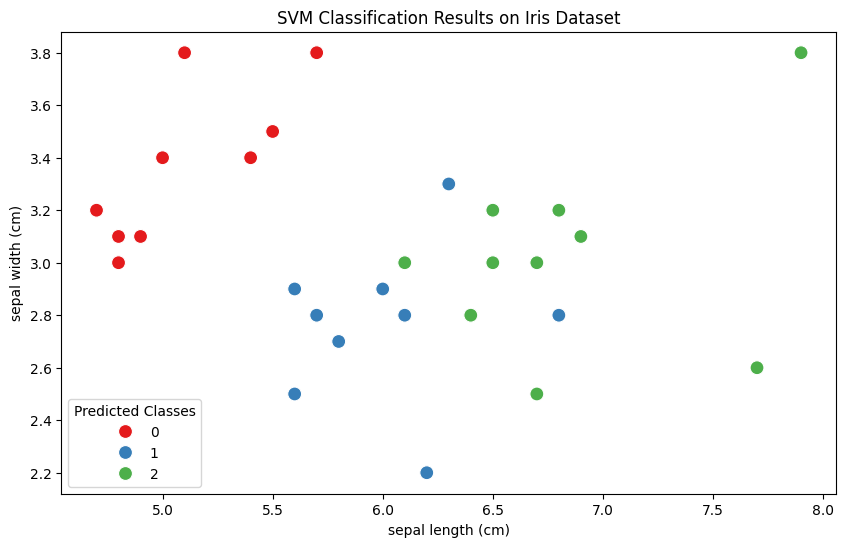

In [21]:

# Visualize the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, palette='Set1', s=100)
plt.title("SVM Classification Results on Iris Dataset")
plt.xlabel(data.feature_names[0])  # Corrected to use the actual feature name
plt.ylabel(data.feature_names[1])  # Corrected to use the actual feature name
plt.legend(title='Predicted Classes')  # Corrected 'tittle' to 'title'
plt.show()